#### Markowitz efficient frontier
The stocks we are looking at in this illustration are Walmart, Facebook and Apple inc.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB','AAPL']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))
num_assets = len(assets)

In [3]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.24507868, 0.64872007, 0.10620125])

Determing the expected portfolio return by calculating the sum of weighted average annualized log returns.

In [4]:
np.sum(weights * log_returns.mean()) * 250

0.19625589976887048

Expected Portfolio Variance:

In [5]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.06051831313607899

Expected Portfolio Volatility:

In [6]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2460047014511694

***

In our illustration we are considering to generate 1000 simulations. random weights that sum up to 1. And obtain our portfolio returns and volatility based on them.

In [7]:
pf_returns = []
pf_volatilities = []

In [8]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.2233096258737945,
  0.1431553503524226,
  0.17873937276247123,
  0.23405717485089464,
  0.16306139739228617,
  0.23807068630055248,
  0.2402168872702716,
  0.1931180084019352,
  0.18265205049615515,
  0.23923249773089272,
  0.22457409247490312,
  0.2453810487576388,
  0.23345728502622354,
  0.1912157653703435,
  0.217206466407459,
  0.25003674131481024,
  0.19241715008173405,
  0.19830512950275422,
  0.19900819268518863,
  0.19186909240944613,
  0.18313155675305665,
  0.17840842254224512,
  0.2289712530567877,
  0.21706246553866382,
  0.1600952704212663,
  0.17903716587988358,
  0.2441280836590915,
  0.19628296398773018,
  0.17569388218691134,
  0.19111628908740674,
  0.17757094653385597,
  0.19037424979458153,
  0.20204822388915428,
  0.1782943807389343,
  0.19009429722946053,
  0.14052940106477949,
  0.17640116614952436,
  0.14485793769768932,
  0.1977918566374426,
  0.23552660826689628,
  0.1792821414968744,
  0.22174627672229655,
  0.2012035755225457,
  0.1872246669419924,
  0.

Transformed the obtained lists into arrays and reassigned them to pf_returns and pf_volatilites below:

In [9]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.22330963, 0.14315535, 0.17873937, 0.23405717, 0.1630614 ,
        0.23807069, 0.24021689, 0.19311801, 0.18265205, 0.2392325 ,
        0.22457409, 0.24538105, 0.23345729, 0.19121577, 0.21720647,
        0.25003674, 0.19241715, 0.19830513, 0.19900819, 0.19186909,
        0.18313156, 0.17840842, 0.22897125, 0.21706247, 0.16009527,
        0.17903717, 0.24412808, 0.19628296, 0.17569388, 0.19111629,
        0.17757095, 0.19037425, 0.20204822, 0.17829438, 0.1900943 ,
        0.1405294 , 0.17640117, 0.14485794, 0.19779186, 0.23552661,
        0.17928214, 0.22174628, 0.20120358, 0.18722467, 0.16594305,
        0.20082378, 0.19918274, 0.16722308, 0.20896272, 0.21613265,
        0.22900575, 0.19381863, 0.20051711, 0.2380045 , 0.17204768,
        0.19203965, 0.1731033 , 0.24074197, 0.20383173, 0.22204914,
        0.19038853, 0.20465251, 0.17443388, 0.18686326, 0.2455101 ,
        0.22777912, 0.17411803, 0.18120543, 0.14438528, 0.18885505,
        0.20227521, 0.23623783, 0.23965314, 0.18

We have created the list of random numbers under Return and volatility based on our array.

In [10]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [11]:
portfolios.head()

,Return,Volatility
0,0.223310,0.307291
1,0.143155,0.188423
2,0.178739,0.199885
3,0.234057,0.239898
4,0.163061,0.200034


Finally, below is the graph that represents rate of return and expected volatility.

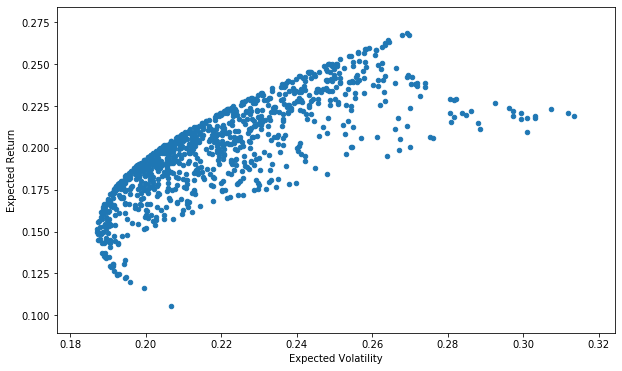

In [12]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

******